<a href="https://colab.research.google.com/github/hajnayeb/Python-Visualization/blob/main/Basic_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

In [41]:
df_c = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                        sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)

print ('Data read as a dataframe!')

Data read as a dataframe!


In [42]:
df_c.drop(['AREA','REG','DEV','Type','Coverage','DevName'], axis=1, inplace=True)
df_c.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
# Adding a new column, 'Total':
df_c['Total'] = df_c.sum(axis=1)
df_c.head(2)

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699


In [43]:
# We change the index from numbers to countries:
df_c.set_index('Country', inplace=True)
# removing 'Country' from the column name of the index
df_c.index.name = None
df_c.head(3)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [44]:
# we create a string list of years which is useful for plotting later
years = list(map(str, range(1980, 2014)))
df_c.columns = list(map(str, df_c.columns))
print(df_c.columns)

Index(['Continent', 'Region', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', 'Total'],
      dtype='object')


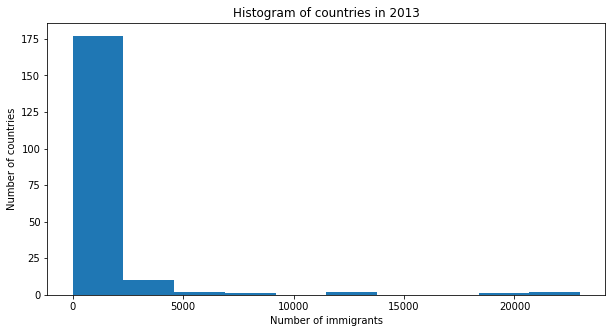

In [45]:
# Plotting a histogram:
df_c['1997'].plot(kind='hist',figsize=(10, 5))
plt.title('Histogram of countries in 2013')
plt.ylabel('Number of countries')
plt.xlabel('Number of immigrants')
plt.show()

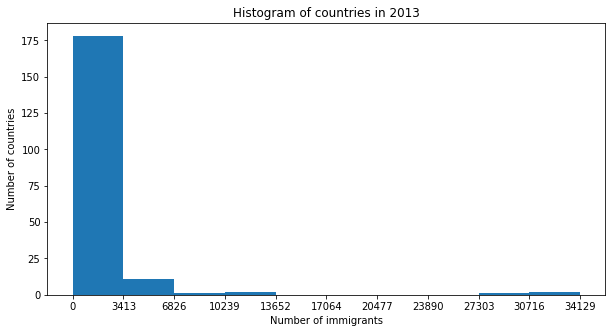

In [46]:
# making the histogram look better:
count, bin_edges = np.histogram(df_c['2013'])
df_c['2013'].plot(kind='hist',xticks = bin_edges,figsize=(10, 5))
plt.title('Histogram of countries in 2013')
plt.ylabel('Number of countries')
plt.xlabel('Number of immigrants')
plt.show()

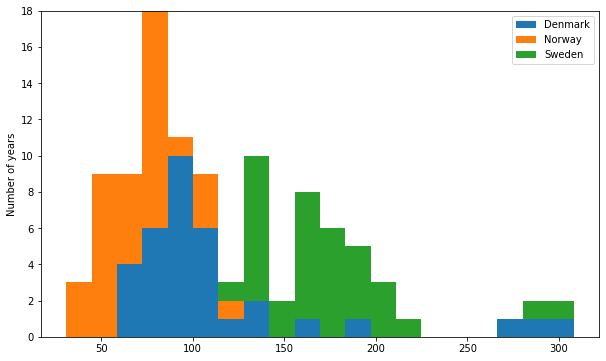

In [47]:
df_t = df_c.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.plot(kind='hist',figsize=(10, 6),bins=20,stacked=True)
plt.ylabel('Number of years')
plt.show()

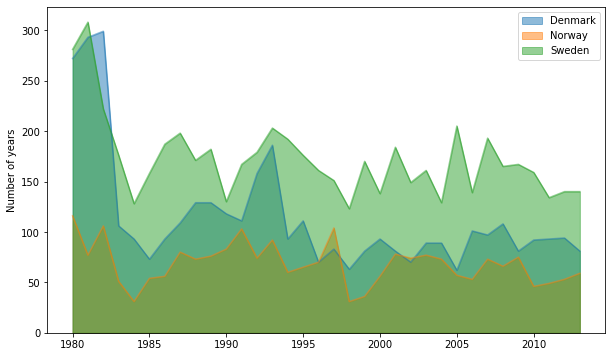

In [48]:
# Unstacked Area Plot of the same data as the previous figure:
df_t = df_c.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.plot(kind='area',figsize=(10, 6), stacked = False)
plt.ylabel('Number of years')
plt.show()

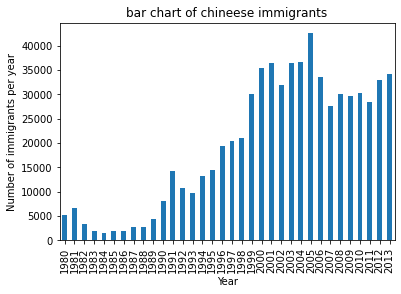

In [17]:
df_china = df_c.loc['China',years]
df_china.plot(kind='bar')
plt.title('bar chart of chineese immigrants')
plt.ylabel('Number of immigrants per year')
plt.xlabel('Year')
plt.show()

In [21]:
## Plotting based on the group of data:
#preparing the data:
df_contin=df_c.groupby('Continent', axis = 0 ).sum()
df_contin.head(2)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794


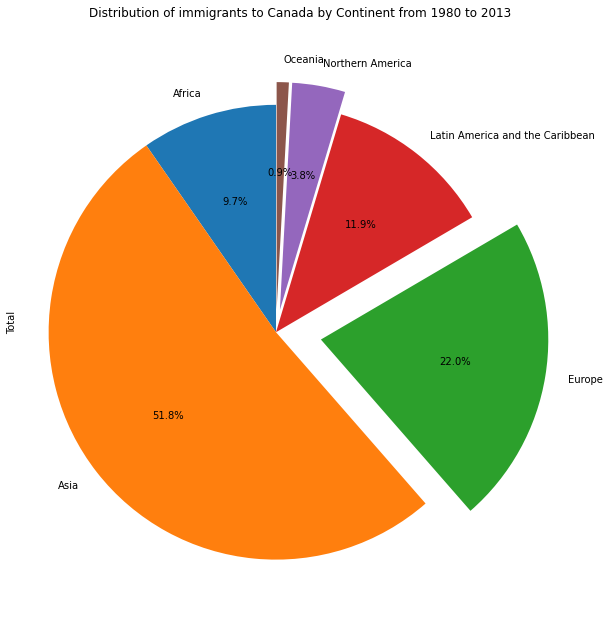

In [29]:
# Plotting a pie chart for the grouped data:
explode_list = [0, 0, 0.2, 0, 0.1, 0.1] # ratio that determines the offset value in the figure for the slice related to each continent
df_contin['Total'].plot(kind='pie', figsize=(10, 11), autopct='%1.1f%%', # add percentage values to each slice
                            startangle=90,     # starting angle 90° (Africa) of the figure
                            explode=explode_list # 'explode' the lowest 3 continents
                            )
plt.title('Distribution of immigrants to Canada by Continent from 1980 to 2013')
plt.axis('equal') # Setting the aspect ratio so that the chart looks like a circle.

plt.show()

In [27]:
# Preparing a new dataset:
df_j = df_c.loc[['Japan','Ireland'],years].transpose();
df_j.head(2)

,Japan,Ireland
1980,701,781
1981,756,895


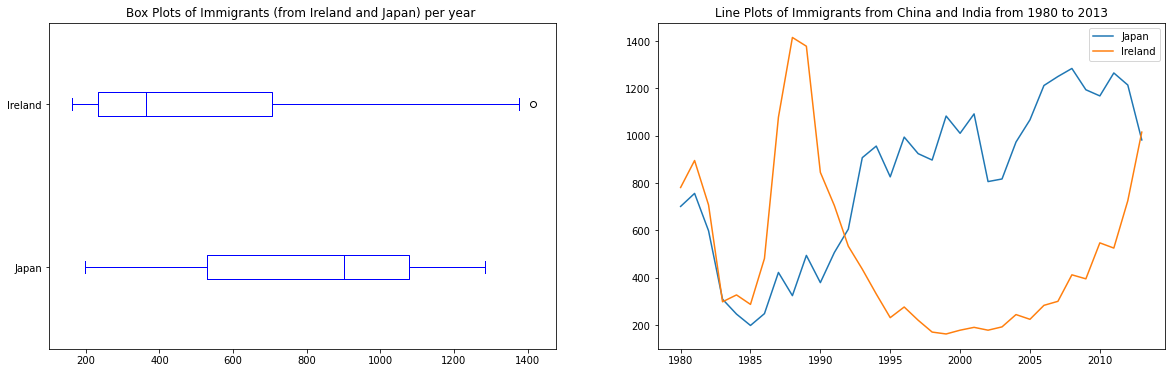

In [30]:
## plotting multiple figures in one frame:
fig = plt.figure() # create an empty figure

ax0 = fig.add_subplot(1, 2, 1) # adding the first subplot 
ax1 = fig.add_subplot(1, 2, 2) # add the second subplot 

# Subplot 1: Box plot horizontal:
df_j.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants (from Ireland and Japan) per year ')

# Subplot 2: Line plot
df_j.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India from 1980 to 2013')

plt.show()

In [52]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_c[years].sum(axis=0))
df_tot.head(2)

,0
1980,99137
1981,110563


In [53]:
# change the years to type int for scatter plot
df_tot.index = map(int, df_tot.index)

# reset the index to add an index column
df_tot.reset_index(inplace = True)

# rename columns 
df_tot.columns = ['year', 'total']

# view the new dataframe
df_tot.head(2)

,year,total
0,1980,99137
1,1981,110563


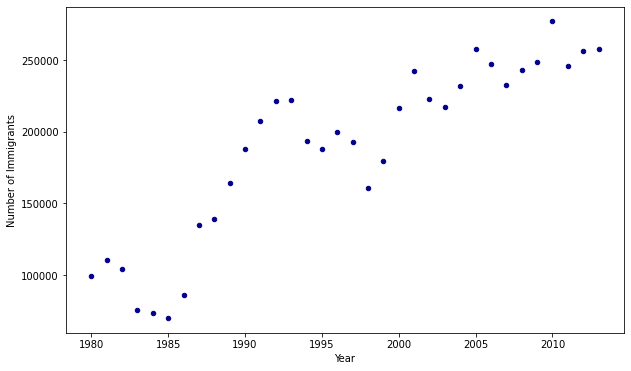

In [54]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()